<a href="https://colab.research.google.com/github/gitesh216/ml-comment-sentiment/blob/main/yt_comment_eda_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df.shape

(37249, 2)

In [ ]:
df.sample()['clean_comment'].values

array(['help behind and need this win man ppr pick brandon marshall dion lewis jets james white jets'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [ ]:
df.isnull().sum()

,0
clean_comment,100
category,0


In [ ]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [ ]:
df[df['clean_comment'].isna()]['category'].value_counts()

,count
category,
0,100


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(350)

In [ ]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
375,,0
392,,0
651,,0
1222,,0
...,...,...
35711,,0
35778,,0
35987,,0
36707,,0


In [ ]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [ ]:
# Convert the 'clean_comment' column to lowercase
df['clean_comment'] = df['clean_comment'].str.lower()

# Verify the transformation by diplaying the first few rows
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
# Remove trailing and leading whitespaces from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.strip()

# Verify the transformation by checking any remaining trailing whitespaces
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category


In [ ]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-f]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()

,clean_comment,category


In [ ]:
# Identify comments containing new line characters
comments_with_newline = df[df['clean_comment'].str.contains('\n')]

# Display the comments containing new libe characters
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [ ]:
# Remove new line charcters from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex = True)

# Verify the transformation by checking for any remaining new lines
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining

,clean_comment,category


EDA

<Axes: xlabel='category', ylabel='count'>

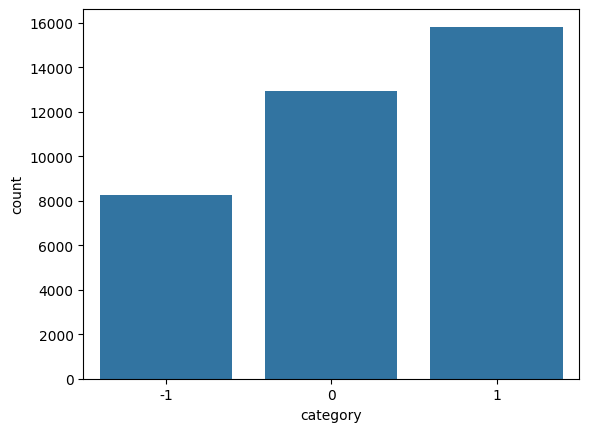

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Distribution of classes

sns.countplot(data=df, x="category")

In [ ]:
# Frequency distribution of sentiments

df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,42.75
0,34.90
-1,22.35


In [ ]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [ ]:
df.sample(5)

,clean_comment,category,word_count
30470,what your take krishna joining bjp your mother...,0,32
23950,what joke everything visible except atal,0,6
18225,future mla,0,2
13128,four americans died the 2012 benghazi attack a...,0,29
15460,one piece advice leave this motherfucking coun...,1,39


In [ ]:
df['word_count'].describe()

,word_count
count,37028.000000
mean,29.499919
std,56.654363
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


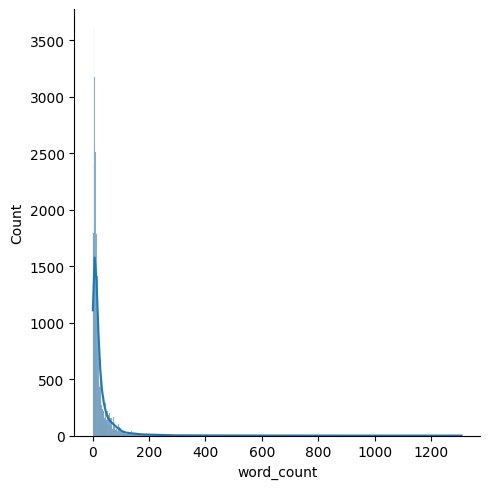

In [ ]:
sns.displot(df['word_count'], kde=True)

Text(0, 0.5, 'Density')

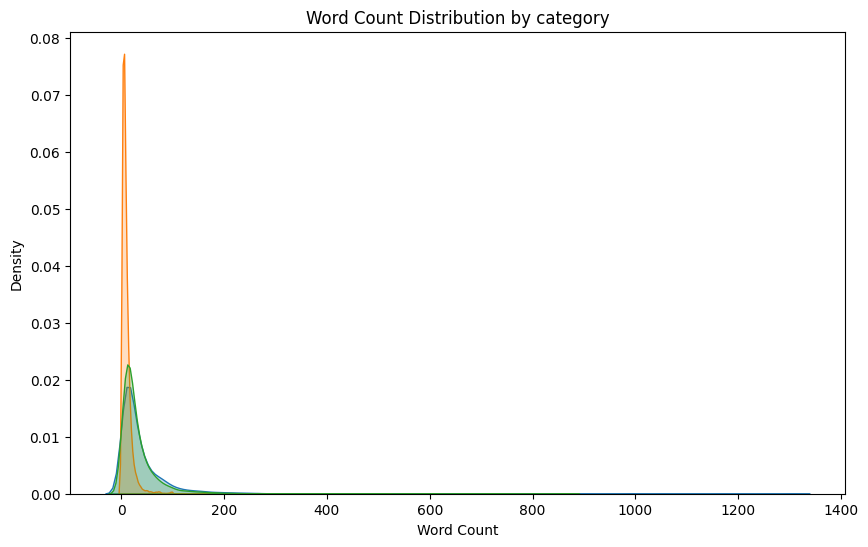

In [ ]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE or category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive',fill=True)

# Plot KDE for Category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral',fill=True)

# PLot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative',fill=True)

# Add title and labels
plt.title('Word Count Distribution by category')
plt.xlabel('Word Count')
plt.ylabel('Density')

**Positive comments (Category 1):** These thed to have a wider spread in word counr, indicating that longer comments are more common in postive sentiments.
**Neutral comments(category 0):** The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.
**Negative commetns (category -1):** These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.

<Axes: ylabel='word_count'>

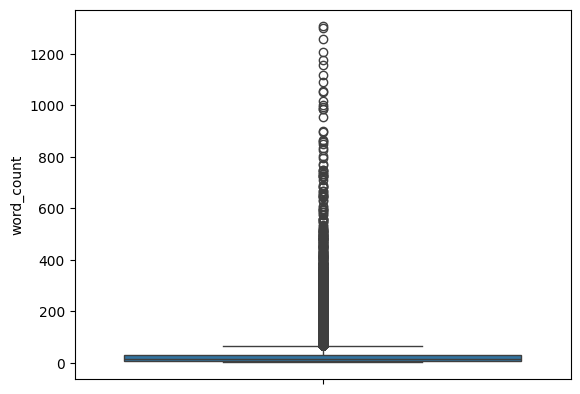

In [ ]:
sns.boxplot(df['word_count'])

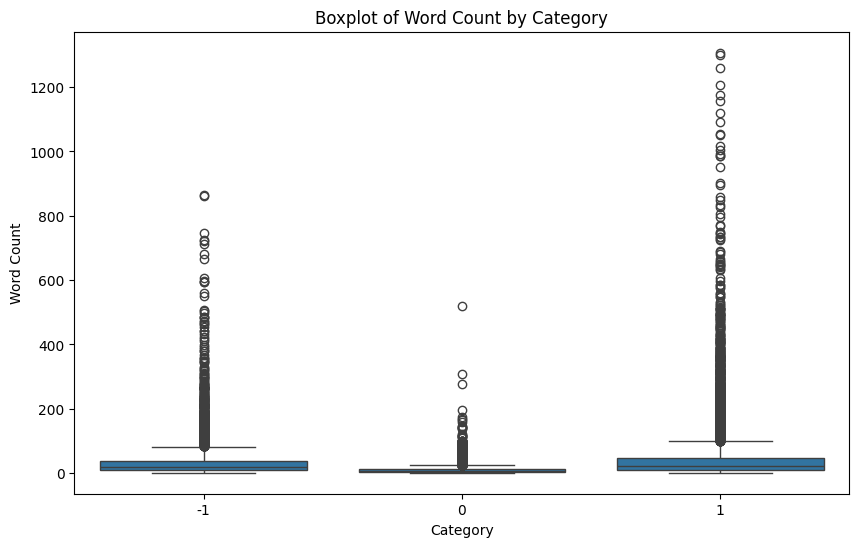

In [ ]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

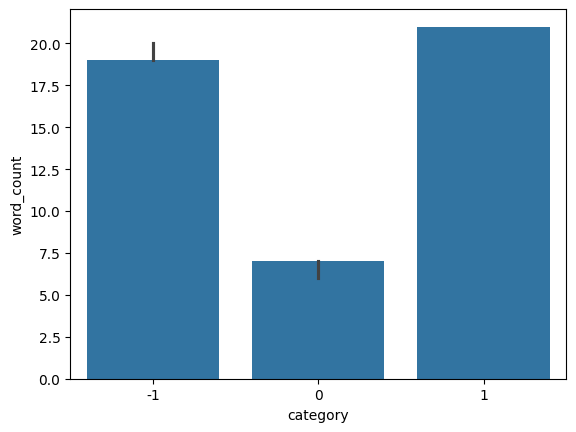

In [ ]:
# median word counts among sentiments

sns.barplot(df, x='category', y='word_count', estimator='median')

Some pre-processing using NLTK

In [ ]:
!pip install nltk

In [ ]:
from nltk.corpus import stopwords

#Download NLTK stopwords
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
29244,saying all wannabes start debating will love j...,1,10,4
21481,2008 islamic terrorists murdered 164 people an...,-1,18,5
19198,til about िििा that segment was beautiful what...,1,10,4
17222,commenting watch later,0,3,0
189,very impressed with gnabry movement and linkin...,1,15,5


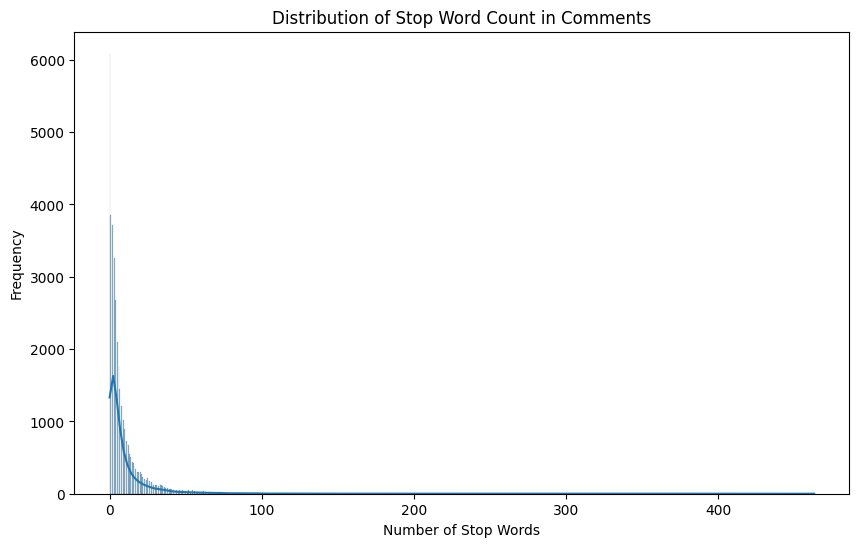

In [ ]:
# Create a distribution plot (displot) for the 'num_stop_words" column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel("Number of Stop Words")
plt.ylabel("Frequency")
plt.show()

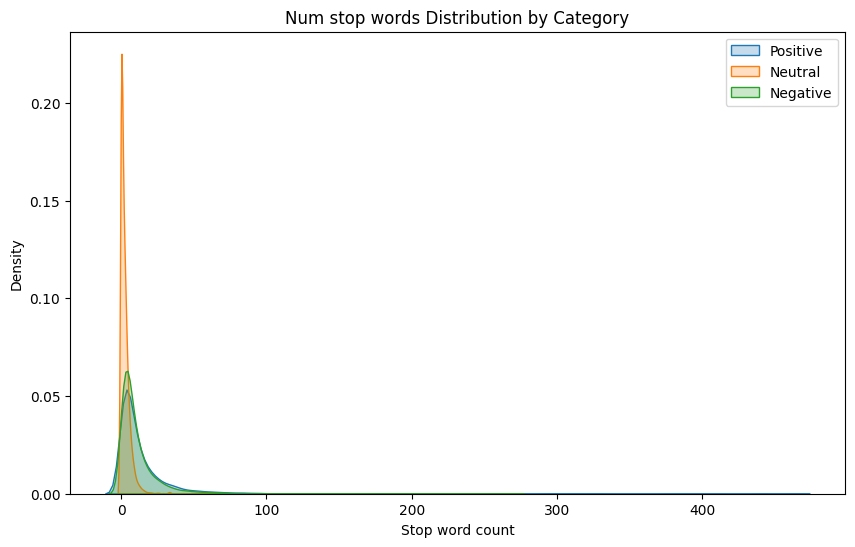

In [ ]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label="Positive", fill=True)

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label="Neutral", fill=True)

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label="Negative", fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel("Stop word count")
plt.ylabel("Density")

# Add a legend
plt.legend()

# Show the plot
plt.show()


<Axes: xlabel='category', ylabel='num_stop_words'>

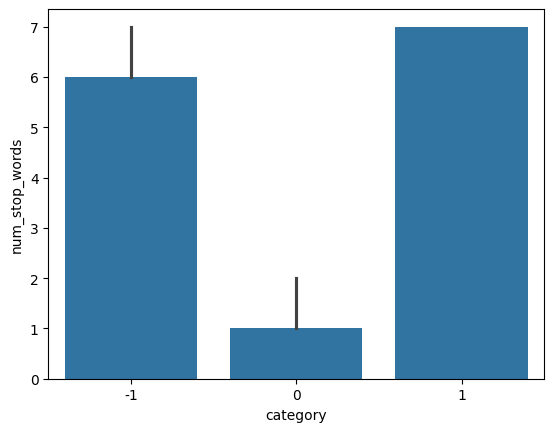

In [ ]:
# median word counts among sentiments

sns.barplot(df, x='category', y='num_stop_words', estimator='median')

/tmp/ipython-input-101498387.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


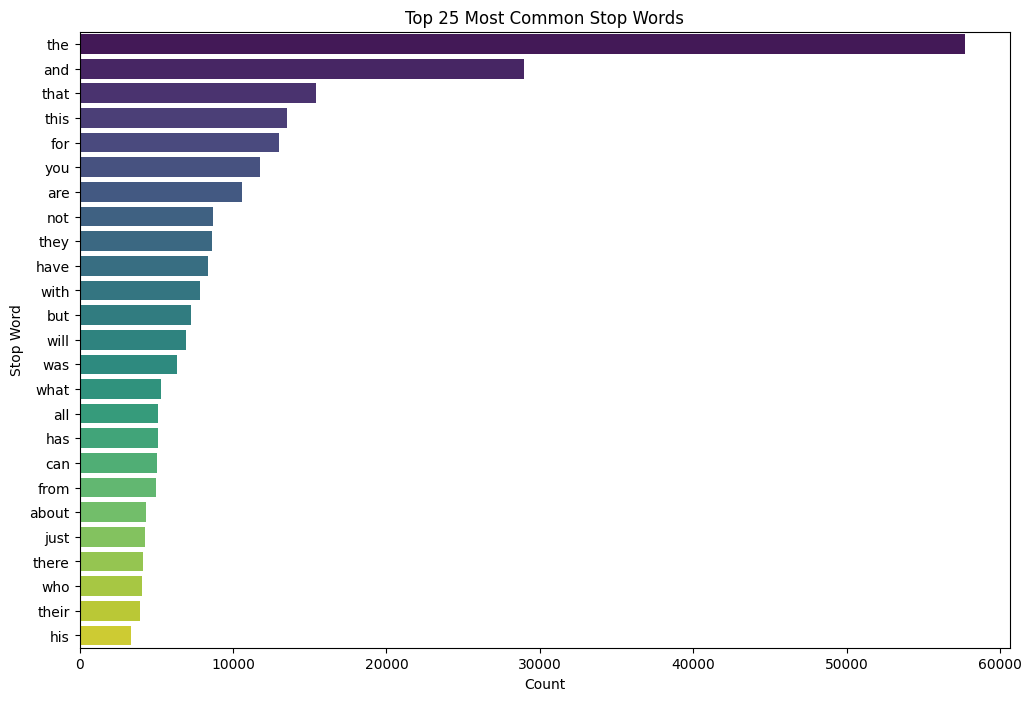

In [ ]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()


In [ ]:
df['num_chars'] = df['clean_comment'].apply(len)

df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [ ]:
df['num_chars'].describe()

,num_chars
count,37028.000000
mean,180.813303
std,358.823615
min,1.000000
25%,37.000000
50%,79.000000
75%,183.000000
max,8664.000000


In [ ]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)


In [ ]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '段', '她', '谁'], dtype=object)

In [ ]:
char_frequency_df.tail(50)

,character,frequency
1286,货,1
1287,语,1
1312,耐,1
1313,精,1
342,━,1
345,⊂,1
346,゜,1
347,ｊ,1
1289,显,1
1291,鞋,1


In [ ]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)
df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
36103,ि्ा ि्ा े सबको plan ाे।,0,6,0,23,0
9124,prolly yeah for ladies night happy that tradit...,1,25,13,156,0
19835,optics,0,1,0,6,0
1098,don mess with amma,-1,4,2,18,0
17434,you want fight stupidity with spam,-1,6,2,34,0


In [ ]:
df['num_punctuation_chars'].describe()

,num_punctuation_chars
count,37028.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


/tmp/ipython-input-4165434067.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


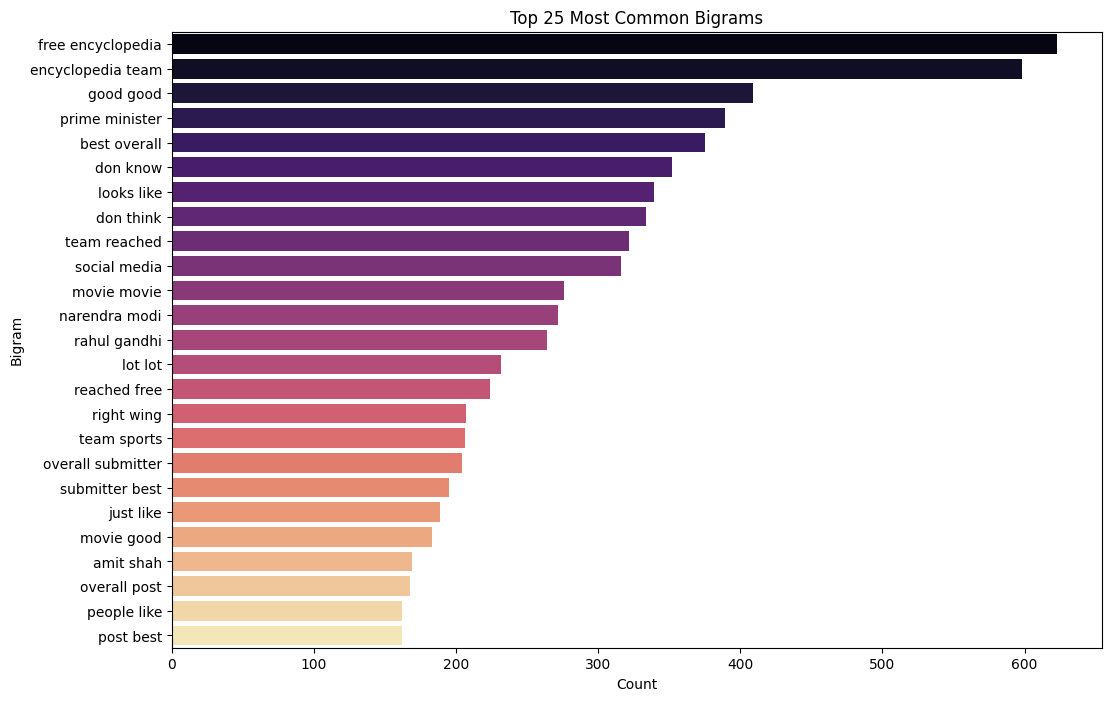

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
  vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
  return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

/tmp/ipython-input-3196194268.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


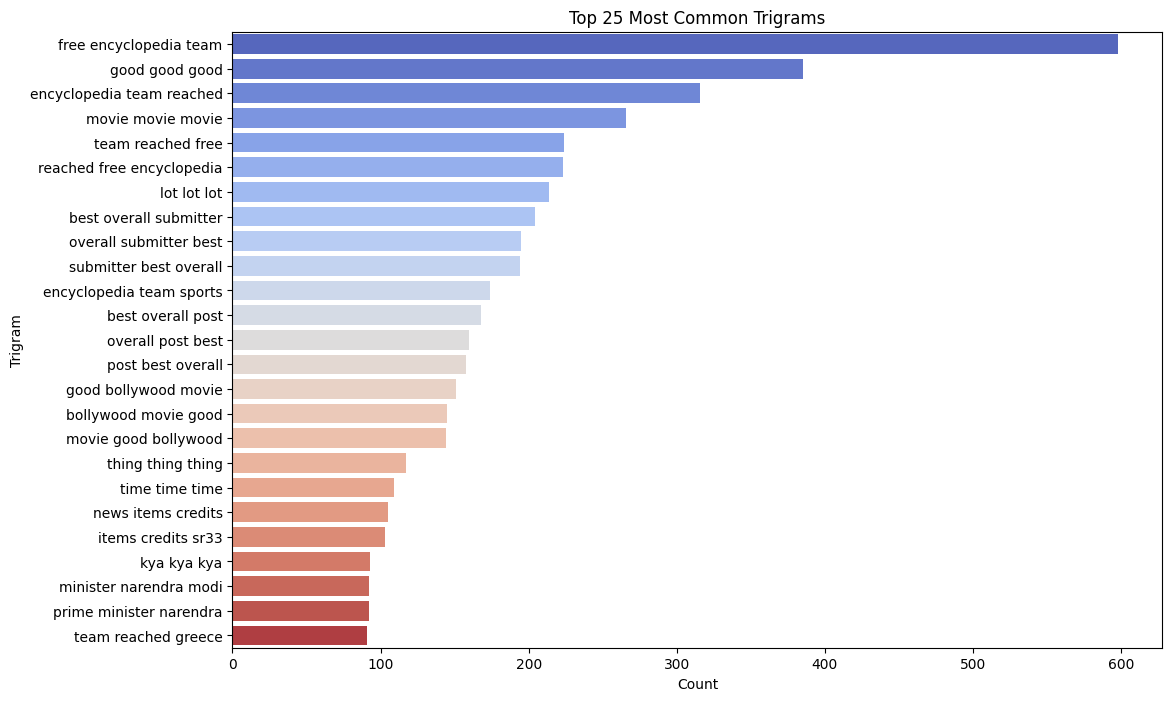

In [ ]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
  vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
  return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [ ]:
# Remove non-English characters from the 'clean_comment' coloumn
# Keeping only standard English letters, digits, and common punctuation
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))


In [ ]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a Dataframe for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['characters', 'frequency']).sort_values(by='frequency')

char_frequency_df

,characters,frequency
39,,1
40,,3
37,\t,11
38,,76
33,8,1199
36,7,1291
28,6,1403
29,4,1573
35,3,1617
27,5,1631


In [ ]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [ ]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)



In [ ]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


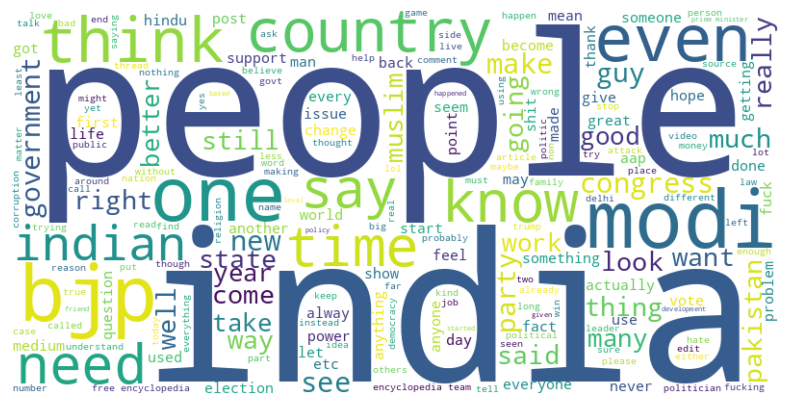

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

plot_word_cloud(df['clean_comment'])

In [ ]:
df.sample()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
32987,not much pseudo secular,-1,6,3,32,0


In [ ]:
df['clean_comment'][0]

'family mormon never tried explain still stare puzzled time time like kind strange creature nonetheless come admire patience calmness equanimity acceptance compassion developed thing buddhism teach'

In [ ]:
df.to_excel('output.xlsx', index=False)